# Train an RBM on any dataset.
# Extract meaningful features from input data.
# Use extracted features for classification.

Training RBM...
Extracting features...
Training classifier...
Training accuracy: 0.7386
Testing accuracy: 0.6900


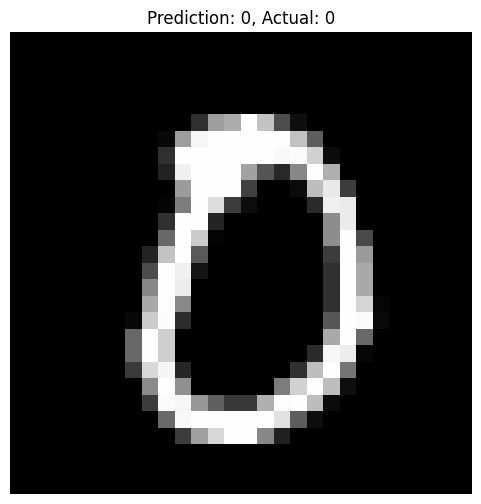

Predicted digit: 0
Actual digit: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255.0

n_train = 5000
n_test = 1000

print("Training RBM...")
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, batch_size=100, n_iter=5, random_state=42)
rbm.fit(x_train[:n_train])

print("Extracting features...")
train_features = rbm.transform(x_train[:n_train])
test_features = rbm.transform(x_test[:n_test])

print("Training classifier...")
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_features, y_train[:n_train])

train_predictions = classifier.predict(train_features)
train_accuracy = accuracy_score(y_train[:n_train], train_predictions)
print(f"Training accuracy: {train_accuracy:.4f}")

test_predictions = classifier.predict(test_features)
test_accuracy = accuracy_score(y_test[:n_test], test_predictions)
print(f"Testing accuracy: {test_accuracy:.4f}")

random_idx = np.random.randint(0, n_test)
random_image = x_test[random_idx]
actual_label = y_test[random_idx]

features = rbm.transform(random_image.reshape(1, -1))
prediction = classifier.predict(features)[0]

plt.figure(figsize=(6, 6))
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {prediction}, Actual: {actual_label}")
plt.axis('off')
plt.show()

print(f"Predicted digit: {prediction}")
print(f"Actual digit: {actual_label}")

# Alternative Approach

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Loading MNIST dataset...
Training with 10000 samples, testing with 2000 samples

Training RBM...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -212.71, time = 4.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -202.17, time = 2.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -191.97, time = 1.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -182.67, time = 1.36s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -172.96, time = 1.34s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -165.56, time = 2.46s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -156.85, time = 2.41s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -150.83, time = 1.31s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -145.87, time = 3.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -142.26, time = 3.75s

Visualizing reconstructions...


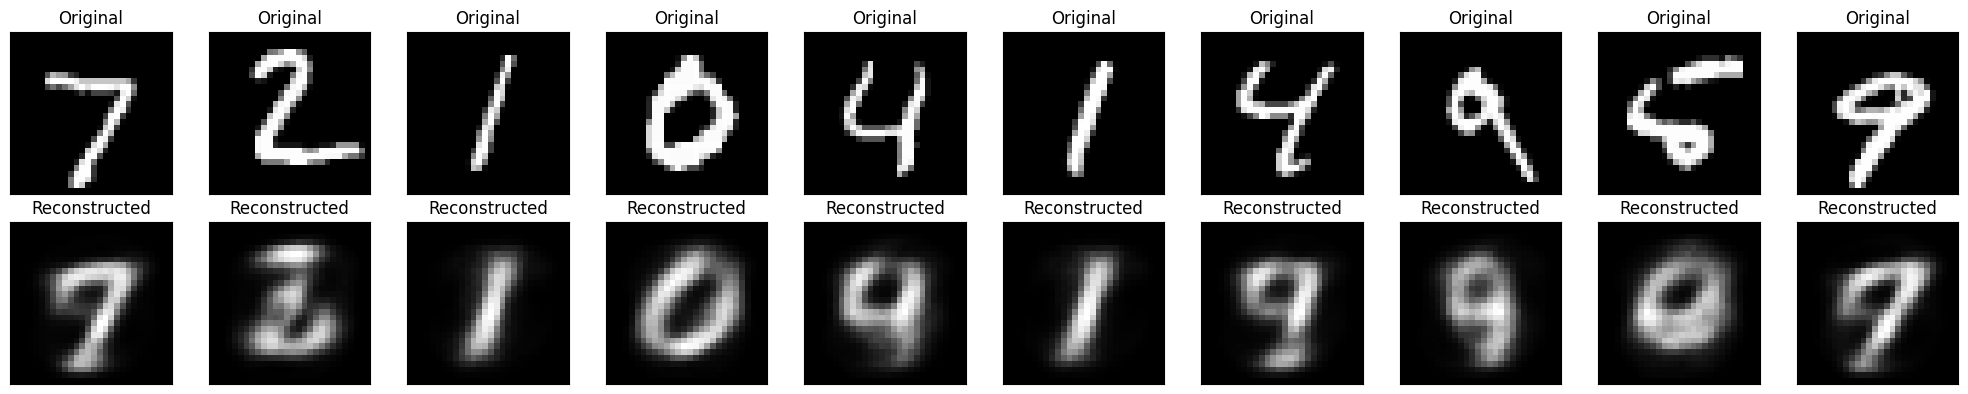


Visualizing learned features...


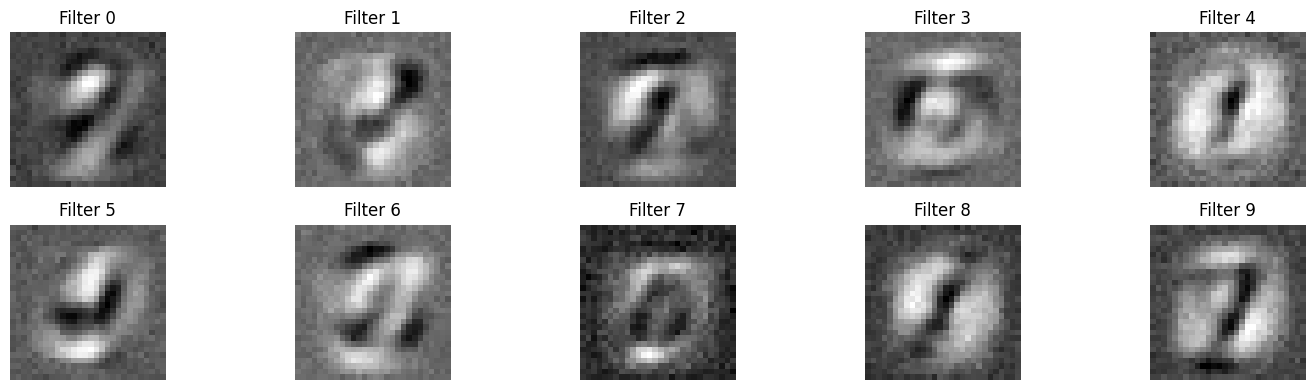


Transforming data with RBM...

Training classifier on RBM features...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating model...
Test accuracy: 0.8910

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       175
           1       0.96      0.99      0.97       234
           2       0.89      0.88      0.89       219
           3       0.89      0.86      0.87       207
           4       0.92      0.90      0.91       217
           5       0.86      0.88      0.87       179
           6       0.88      0.89      0.89       178
           7       0.89      0.84      0.86       205
           8       0.87      0.80      0.83       192
           9       0.80      0.89      0.84       194

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000


Demonstrating pipeline approach...

Training classifier directly on raw pixels for comparison...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Direct classification accuracy (without RBM): 0.8700


In [ ]:
np.random.seed(1234)

def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()


    x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255.0
    x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255.0

    return x_train, y_train, x_test, y_test


def reconstruct_images(rbm, x):
    """Reconstruct images by passing from visible->hidden->visible layers"""
    h = rbm.transform(x)


    v = np.dot(h, rbm.components_) + rbm.intercept_visible_

    v = 1.0 / (1.0 + np.exp(-v))

    return v


def plot_reconstructions(rbm, x_test, n_samples=10):
    plt.figure(figsize=(20, 4))


    reconstructed = reconstruct_images(rbm, x_test[:n_samples])

    for i in range(n_samples):

        ax = plt.subplot(2, n_samples, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


        ax = plt.subplot(2, n_samples, n_samples + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

def plot_rbm_filters(rbm, n_filters=10):
    plt.figure(figsize=(15, 4))
    for i in range(n_filters):
        plt.subplot(2, n_filters//2, i+1)
        plt.imshow(rbm.components_[i].reshape(28, 28), cmap='gray')
        plt.title(f"Filter {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def main():
    print("Loading MNIST dataset...")
    x_train, y_train, x_test, y_test = load_mnist()

    n_train_samples = 10000
    n_test_samples = 2000
    x_train_subset = x_train[:n_train_samples]
    y_train_subset = y_train[:n_train_samples]
    x_test_subset = x_test[:n_test_samples]
    y_test_subset = y_test[:n_test_samples]

    print(f"Training with {n_train_samples} samples, testing with {n_test_samples} samples")


    rbm = BernoulliRBM(
        n_components=200,
        learning_rate=0.01,
        batch_size=100,
        n_iter=10,
        verbose=True,
        random_state=1234
    )


    print("\nTraining RBM...")
    rbm.fit(x_train_subset)


    print("\nVisualizing reconstructions...")
    plot_reconstructions(rbm, x_test_subset)


    print("\nVisualizing learned features...")
    plot_rbm_filters(rbm)


    print("\nTransforming data with RBM...")
    x_train_features = rbm.transform(x_train_subset)
    x_test_features = rbm.transform(x_test_subset)


    print("\nTraining classifier on RBM features...")
    classifier = LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        multi_class='multinomial',
        random_state=1234
    )
    classifier.fit(x_train_features, y_train_subset)


    print("\nEvaluating model...")
    y_pred = classifier.predict(x_test_features)
    accuracy = accuracy_score(y_test_subset, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test_subset, y_pred))


    print("\nDemonstrating pipeline approach...")
    pipeline = Pipeline([
        ('rbm', BernoulliRBM(
            n_components=200,
            learning_rate=0.01,
            batch_size=100,
            n_iter=10,
            verbose=True,
            random_state=1234
        )),
        ('classifier', LogisticRegression(
            solver='lbfgs',
            max_iter=1000,
            multi_class='multinomial',
            random_state=1234
        ))
    ])


    """
    print("Training pipeline...")
    pipeline.fit(x_train_subset, y_train_subset)
    pipeline_accuracy = pipeline.score(x_test_subset, y_test_subset)
    print(f"Pipeline test accuracy: {pipeline_accuracy:.4f}")
    """


    print("\nTraining classifier directly on raw pixels for comparison...")
    direct_classifier = LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        multi_class='multinomial',
        random_state=1234
    )
    direct_classifier.fit(x_train_subset, y_train_subset)
    direct_accuracy = direct_classifier.score(x_test_subset, y_test_subset)
    print(f"Direct classification accuracy (without RBM): {direct_accuracy:.4f}")

    return rbm, classifier, direct_classifier

if __name__ == "__main__":
    rbm, classifier, direct_classifier = main()

# Stacked RBM

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
X = MinMaxScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rbm1 = BernoulliRBM(n_components=256, learning_rate=0.01, batch_size=10, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.01, batch_size=10, n_iter=10, random_state=42)


rbm1.fit(X_train)
X_train_rbm1 = rbm1.transform(X_train)
X_test_rbm1 = rbm1.transform(X_test)


rbm2.fit(X_train_rbm1)
X_train_rbm2 = rbm2.transform(X_train_rbm1)
X_test_rbm2 = rbm2.transform(X_test_rbm1)


classifier = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=42)
classifier.fit(X_train_rbm2, y_train)


accuracy = classifier.score(X_test_rbm2, y_test)
print(f"Classification Accuracy using Stacked RBM Features: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Accuracy using Stacked RBM Features: 0.9536
